In [1]:
%matplotlib inline

import scipy.stats as states
import pandas as pd;
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
SportSample = pd.read_csv("C:/Users/USER/OneDrive/Desktop/Data/StudentCleanedSample.csv")
SportSample.head()

,Activities,Total Grade,Year 10 Grade,Year 11 Grade,Year 12 Grade
0,no,7.333333,0,11,11
1,no,10.333333,9,11,11
2,no,12.333333,12,13,12
3,yes,14.000000,14,14,14
4,no,12.333333,11,13,13


In [3]:
SportSample['Activities'] = SportSample['Activities'].map({'yes': 1, 'no': 0})
SportSample.head()

,Activities,Total Grade,Year 10 Grade,Year 11 Grade,Year 12 Grade
0,0,7.333333,0,11,11
1,0,10.333333,9,11,11
2,0,12.333333,12,13,12
3,1,14.000000,14,14,14
4,0,12.333333,11,13,13


In [4]:
def corr_coeff(df,x,y):
  # we need to calculate the means of the 2 columns
  x_bar = df[x].mean()
  y_bar = df[y].mean()
  # we need to calculate the sample deviation of the 2 columns
  x_sd = df[x].std()
  y_sd = df[y].std()
  # we need to standardize the columns and multiply and then eventually sum all the products
  total_product = (((df[x]-x_bar)/x_sd) * ((df[y]-y_bar)/y_sd)).sum()
  corr = (total_product)/(df.shape[0]-1)

  return corr


In [5]:
corr_coeff(SportSample,'Activities','Total Grade')

0.07162125146575031

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
x = SportSample[SportSample.columns[0:1]].to_numpy()
y=  SportSample[SportSample.columns[1:2]].to_numpy()

In [8]:
linreg = LinearRegression()

In [9]:
x=x.reshape(-1,1)

In [10]:
linreg.fit(x,y)

LinearRegression()

In [11]:
y_pred=linreg.predict(x)

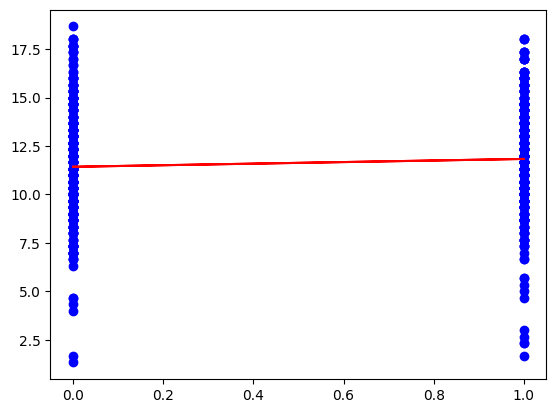

In [12]:
plt.scatter(x,y,color='blue')
plt.plot(x,y_pred,color='red')

In [13]:
print("There is no relation between participating in activities and grades")

There is no relation between participating in activities and grades


In [14]:
(SportSample['Activities'] == 0).count()

649

the number of nos are 334
51.463790446841294 %
the number of yeses are 315
48.536209553158706 %
the number of both nos and yeses are 649


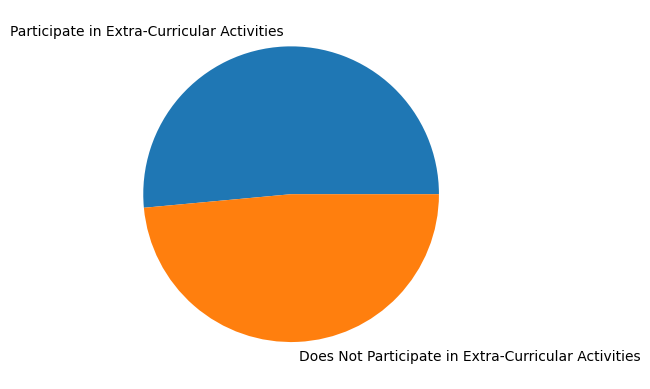

In [15]:
countNo = (SportSample['Activities'] == 0).sum()
countYes = (SportSample['Activities'] == 1).sum()
totalcount = len(SportSample.axes[0])
print ('the number of nos are',countNo)
print((countNo/totalcount)*100,'%')
print ('the number of yeses are',countYes)
print((countYes/totalcount)*100,'%')
print ('the number of both nos and yeses are',totalcount)

y = np.array([countNo,countYes])
mylabels = ["Participate in Extra-Curricular Activities", "Does Not Participate in Extra-Curricular Activities"]
plt.pie(y,labels = mylabels)
plt.show() 

In [16]:
Participant_grades = SportSample[SportSample['Activities'] == 0]
NonParticipant_grades = SportSample[SportSample['Activities'] == 1]
states.ttest_ind(Participant_grades['Total Grade'],NonParticipant_grades['Total Grade'])

Ttest_indResult(statistic=-1.8264626333805254, pvalue=0.06824124804997804)

In [17]:
print('acceput null hypothesis as pvalue is bigger than 0.05 which means that we cannot decide the relation between student grade & participating in activities')

acceput null hypothesis as pvalue is bigger than 0.05 which means that we cannot decide the relation between student grade & participating in activities
